In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix 
 
 
df=pd.read_csv("ClassifiedData.csv",index_col=0) 
scaler = StandardScaler() 
scaler.fit(df.drop('TARGET CLASS',axis=1)) 
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1)) 
 
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) 
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30) 
 
#InitiallywithK=1 
knn1=KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train,y_train) 
pred1 = knn1.predict(X_test) 
print("For K=1 results are:") 
print(confusion_matrix(y_test,pred1)) 
print(classification_report(y_test,pred1)) 
 
#NOWWITHK=23 
knn23=KNeighborsClassifier(n_neighbors=23) 
 
knn23.fit(X_train,y_train) 
pred23=knn23.predict(X_test)

print("For K=23 results are:") 
print(confusion_matrix(y_test,pred23)) 
print(classification_report(y_test,pred23))

For K=1 results are:
[[138  10]
 [  8 144]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       148
           1       0.94      0.95      0.94       152

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

For K=23 results are:
[[139   9]
 [  5 147]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       148
           1       0.94      0.97      0.95       152

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



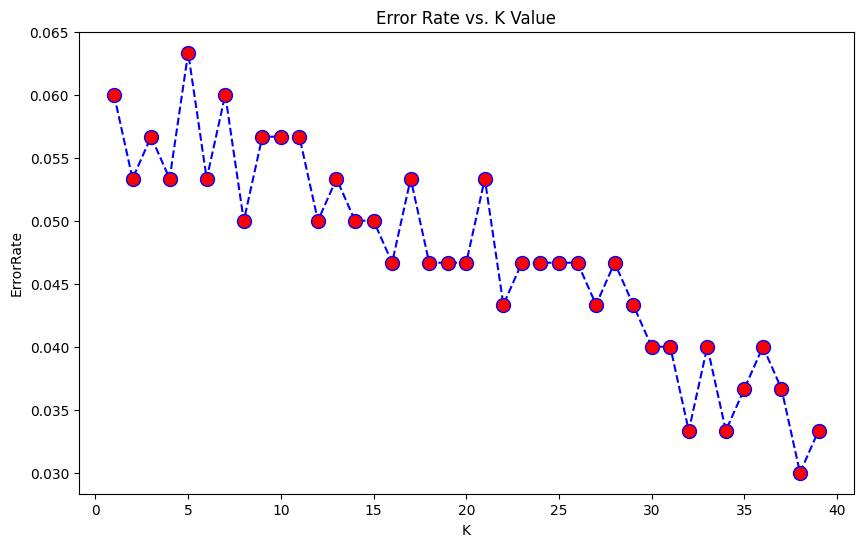

In [3]:
#Choosing K Value: 
error_rate=[] 
for i in range(1,40): 
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6)) 
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10) 
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('ErrorRate') 
plt.show()
